In [28]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import fix_yahoo_finance as fyf
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
stocks = '0012.HK 1113.HK 0683.HK 0017.HK 0083.HK 0016.HK 0020.HK 0004.HK'
stocks = stocks.split()
data = fyf.download(stocks, '2019-05-01')['Close']
data.head()

[*********************100%***********************]  8 of 8 downloaded


,0004.HK,0012.HK,0016.HK,0017.HK,0020.HK,0083.HK,0683.HK,1113.HK
Date,,,,,,,,
2019-05-02,22.90,48.10,135.9,13.10,56.4,13.82,33.45,63.45
2019-05-03,23.15,48.25,137.1,13.24,56.6,13.84,33.40,63.70
2019-05-06,22.90,47.10,134.4,12.76,55.5,13.46,32.45,61.90
2019-05-07,23.05,47.75,135.1,12.96,55.9,13.54,32.80,62.55
2019-05-08,22.80,47.15,134.5,12.84,55.2,13.26,32.55,62.90


In [60]:
returns = pd.DataFrame()
for stock in data:
    if stock not in returns:
        returns[stock] = np.log(data[stock]).diff(5)
returns = returns[1:]
returns.head()

,0004.HK,0012.HK,0016.HK,0017.HK,0020.HK,0083.HK,0683.HK,1113.HK
Date,,,,,,,,
2019-05-03,0.010858,0.003114,0.008791,0.010630,0.003540,0.001446,-0.001496,0.003932
2019-05-06,-0.010858,-0.024123,-0.019890,-0.036927,-0.019626,-0.027841,-0.028855,-0.028664
2019-05-07,0.006529,0.013706,0.005195,0.015552,0.007181,0.005926,0.010728,0.010446
2019-05-08,-0.010905,-0.012645,-0.004451,-0.009302,-0.012601,-0.020896,-0.007651,0.005580
2019-05-09,-0.019934,-0.007451,-0.012720,-0.025238,-0.015518,-0.019803,-0.026461,-0.019262


In [40]:
corr = returns.corr()

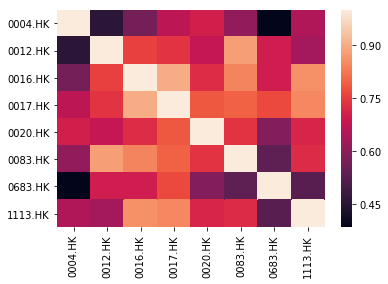

In [41]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

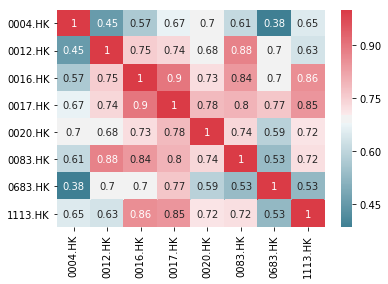

In [46]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

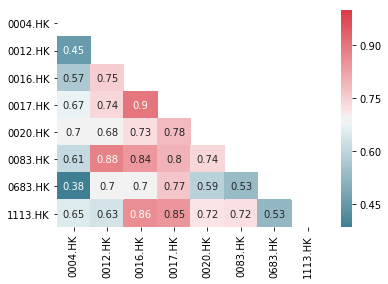

In [47]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

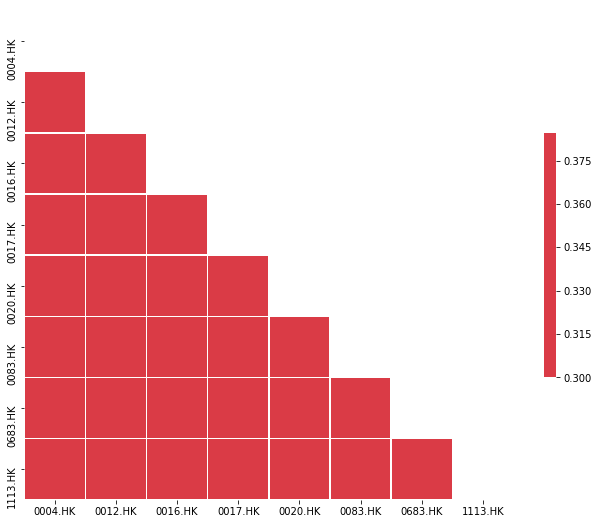

In [42]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [71]:
forex = 'EURUSD=X USDJPY=X GBPUSD=X USDCAD=X USDCHF=X AUDUSD=X'
forex = forex.split()
data2 = fyf.download(forex, '2019-01-01')['Close']
data2.head()

[*********************100%***********************]  6 of 6 downloaded


,AUDUSD=X,EURUSD=X,GBPUSD=X,USDCAD=X,USDCHF=X,USDJPY=X
Date,,,,,,
2018-12-31,0.7045,1.1440,1.2694,1.3622,0.9836,110.330
2019-01-01,0.7042,1.1493,1.2738,1.3394,0.9835,109.630
2019-01-02,0.7048,1.1462,1.2754,1.3625,0.9820,109.668
2019-01-03,0.6919,1.1318,1.2522,1.3631,0.9887,107.441
2019-01-04,0.7006,1.1391,1.2629,1.3479,0.9871,107.808


In [66]:
fcreturns = pd.DataFrame()
for forex in data2:
    if forex not in fcreturns:
        fcreturns[forex] = np.log(data2[forex]).diff(5)
fcreturns = returns[1:]
fcreturns.head()

,0004.HK,0012.HK,0016.HK,0017.HK,0020.HK,0083.HK,0683.HK,1113.HK
Date,,,,,,,,
2019-05-06,-0.010858,-0.024123,-0.019890,-0.036927,-0.019626,-0.027841,-0.028855,-0.028664
2019-05-07,0.006529,0.013706,0.005195,0.015552,0.007181,0.005926,0.010728,0.010446
2019-05-08,-0.010905,-0.012645,-0.004451,-0.009302,-0.012601,-0.020896,-0.007651,0.005580
2019-05-09,-0.019934,-0.007451,-0.012720,-0.025238,-0.015518,-0.019803,-0.026461,-0.019262
2019-05-10,0.008909,0.015899,0.008996,0.003190,0.003673,0.001537,0.015650,0.005657


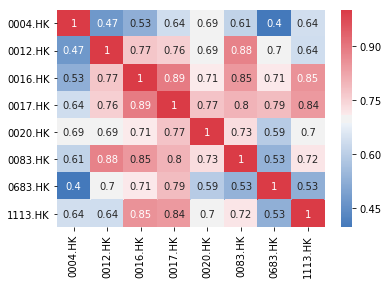

In [67]:
fccorr = fcreturns.corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(fccorr, cmap=cmap, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)